In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cd /content/drive/MyDrive/Colab Notebooks/est

/content/drive/MyDrive/Colab Notebooks/est


In [1]:
!pwd

/home/hyuksu/projects/ml/bootcampdeeplearning


### 새로운 목표
- mlp cnn 모델을 확인해서 이미지 분류 실습을 진행
- 이진분류
- 성능을 높이기 위한 노력을 진행해보자
 - 이미지 증식(확장)
 - 전이 학습

In [12]:
# 데이터 불러오기
import numpy as np
data=np.load('/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_vs_dogs.npz')

In [13]:
data.keys()

KeysView(NpzFile '/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_vs_dogs.npz' with keys: X_train, X_test, Y_trainn, Y_test)

In [5]:
train_x=data['X_train']
train_y=data['Y_trainn']
test_x=data['X_test']
test_y=data['Y_test']
#크기확인
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2000, 224, 224, 3)
(2000,)
(1000, 224, 224, 3)
(1000,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,InputLayer,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping  


In [16]:
train_x[0]

array([[[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 204, 120],
        [242, 202, 122],
        [239, 200, 121]],

       [[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 204, 121],
        [242, 203, 123],
        [240, 201, 122]],

       [[203, 164,  87],
        [205, 166,  89],
        [209, 170,  93],
        ...,
        [245, 205, 122],
        [243, 204, 124],
        [241, 202, 123]],

       ...,

       [[154, 123,  56],
        [155, 124,  57],
        [156, 125,  58],
        ...,
        [  3,   3,   1],
        [  3,   3,   1],
        [  3,   3,   1]],

       [[153, 122,  55],
        [153, 122,  55],
        [154, 123,  56],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [152, 121,  54],
        [153, 122,  55],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

In [9]:
from os import path
from ast import In
mlp=Sequential()

#mlp.add(InputLayer(input_shape=(224,224,3)))
mlp.add(Flatten(input_shape=(224,224,3)))

mlp.add(Dense(units=256,activation='relu'))
mlp.add(Dense(units=128,activation='relu'))
mlp.add(Dense(units=64,activation='relu'))
mlp.add(Dense(units=32,activation='relu'))
mlp.add(Dense(units=16,activation='relu'))
mlp.add(Dense(units=1,activation='sigmoid'))
mlp.summary()
mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

check=ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/est/data/best_model.keras',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True
)


stop=EarlyStopping(monitor='val_accuracy',verbose=True,patience=5)

h=mlp.fit(train_x,train_y,callbacks=[stop],epochs=50,batch_size=32,validation_data=(test_x,test_y))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,579,201 (147.17 MB)

 Trainable params: 38,579,201 (147.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 52s 797ms/step - accuracy: 0.4893 - loss: 1145.0128 - val_accuracy: 0.5000 - val_loss: 618.2598
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 753ms/step - accuracy: 0.5021 - loss: 433.8740 - val_accuracy: 0.5120 - val_loss: 152.2817
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 759ms/step - accuracy: 0.5226 - loss: 255.7904 - val_accuracy: 0.5600 - val_loss: 65.6293
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 759ms/step - accuracy: 0.5886 - loss: 87.4170 - val_accuracy: 0.5360 - val_loss: 81.9684
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 825ms/step - accuracy: 0.5603 - loss: 58.7084 - val_accuracy: 0.5790 - val_loss: 25.9979
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 78s 772ms/step - accuracy: 0.5557 - loss: 52.7231 - val_accuracy: 0.5530 - val_loss: 17.7825
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 840ms/step - accuracy: 0.5444 - loss: 50.2975 - val_accuracy: 0.5610 - val_loss: 20.3273
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 79s 789ms/step - accuracy: 0.6215 - los

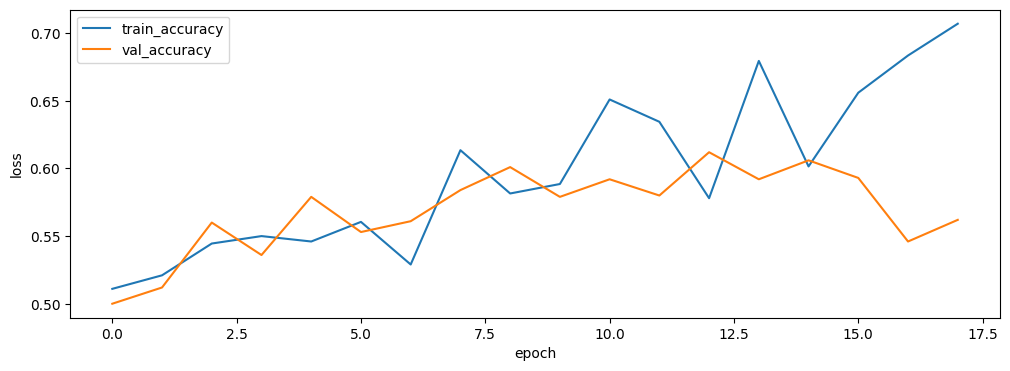

In [12]:
# mlp_his 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### CNN(Convoluntion Neural Network,합성곱 신경망)
### CNN: 공간적인 구조가 중요한 데이터에 주로 사용
## 이미지, 영상, 음성처럼 패턴이나 위치가 중요한 데이터에서 사용

- Conv(컨보루션)층
    - 작은 필터로 이미지를 흝으면서
    - 엣지,선,모양 같은 특징을 추출

- pooling 층
   - 중요한 특징만 남기고 크기르 줄임
   - 연산량 감소 + 노이즈 제거
- Dense 층
   - 추출된 특징을 보고
   - 최종 분류(고양이/강아지) 분류


In [ ]:
# 모델이 학습을 제대로 하지 못한 상황
# 복잡한 데이터. 모델은 단순
# mlp 특성상 이미지에 대한 학습 성능 떨어짐
# 이미지에 대한 파악을 잘 할 수 있게 해보자 -> 중요한 특징을 추출 ->cnn


### cnn 모델 생성

1.모델 설계
 - 뼈대 구축
 - 특성 추출부(Conb,pooling)
 - 분류부

2. 모델 컴파일
3. 학습 및 시각화
4. 예측 및 평가


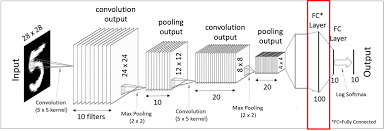

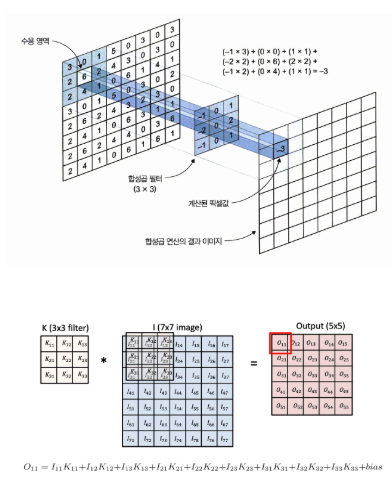

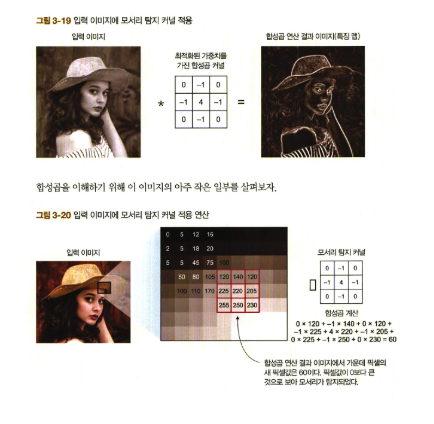

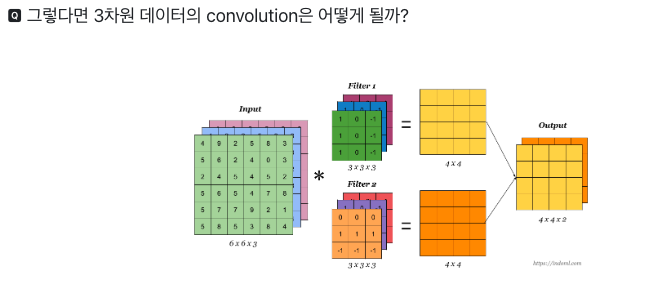

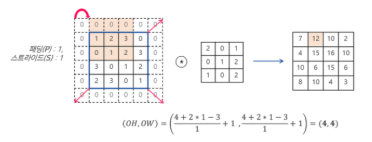

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,InputLayer,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Conv2D: 컨볼루셔널 레이어, 특직을 잡아내는 역할
# MaxPooling2D: 풀링 레이어, 중요한 정보만 걸러내는 역할

In [17]:
# 1. 설계
cnn_model=Sequential()
cnn_model.add(InputLayer(input_shape=(224,224,3)))

#--------- 특징 추출부-------
cnn_model.add(Conv2D(
    filters=32, #커널의 개수
    kernel_size=(3,3), #커널 사이즈 ,눈의 크기
    activation='relu', #활성화 함수
    padding='same', # 패딩: 입출력의 크기를 동일하게 하기위해 가장자리에0을채움
                   # 이미지 자체가 크거나, 특징이 많을떄
                   # -> valid 사용 # 커널이 밖으로 못나감
                   # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있는경우
                   #  ->same # 커널이 밖으로 나갈 경우  0으로 채워짐
    strides=(2,2)  # 보폭, 양 옆과 위아래로 2픽셀 커널을 이동
))
# ------------pooling층------
cnn_model.add(MaxPooling2D(
    pool_size=(2,2), #풀링 윈도우 지정
    # 이미지 탐색에서 그 이미지의 특징을 요약하는 픽셀 크기
))
# -----------------------1개의 층임 이걸반복할거임


cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=(2,2)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# ------------------------------------2층--------


cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',strides=(2,2)))
#이미지에서 특징감지
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
# 중요한 특징 요약 노이즈 제거

# ------------분류부----------

cnn_model.add(Flatten())
cnn_model.add(Dense(256,activation='relu'))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))

cnn_model.add(Dense(1,activation='sigmoid'))
#------ 출력층 까지 ---

# 2. 학습 방법 설정

cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 3. 학습

cnn_h=cnn_model.fit(train_x,train_y,validation_split=0.3,epochs=20,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6049 - loss: 2.1386 - val_accuracy: 0.0333 - val_loss: 1.2430
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 864ms/step - accuracy: 0.7228 - loss: 0.5846 - val_accuracy: 0.7033 - val_loss: 0.6229
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 889ms/step - accuracy: 0.7182 - loss: 0.5809 - val_accuracy: 0.3383 - val_loss: 0.8361
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 834ms/step - accuracy: 0.7274 - loss: 0.5595 - val_accuracy: 0.0250 - val_loss: 1.6780
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 887ms/step - accuracy: 0.7532 - loss: 0.5342 - val_accuracy: 0.4450 - val_loss: 0.8944
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 852ms/step - accuracy: 0.7656 - loss: 0.4899 - val_accuracy: 0.3700 - val_loss: 1.1175
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 836ms/step - accuracy: 0.8036 - loss: 0.4265 - val_accuracy: 0.2417 - val_loss: 1.5107
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 846ms/step - accuracy: 0.8253 - loss: 0.4009 - val_accurac

### 데이터 이미지 증강(증식,확장)을 통한 cnn모델 성능 개선

- 데이터 증강: 이미지 회전, 이동,확대,축소 등을 통해
데이터를 늘리는 작업
- 과대적합이 일어나는 이유 중 하나는 훈련데이터가 부족하기 떄문이다
- 훈련데이터가 충분히 많다면 과대 적합을 줄일 수 있음
- 데이터 확장이란, 훈련데이터를 다양하게 변형하여 변형된 새로운 훈련데이터 처럼 사용함으로써, 마치 훈련데이터 수가 늘어난 효과를 얻은것

- 주의사항!!
  - 증강은 '훈련데이터'에서만 진행

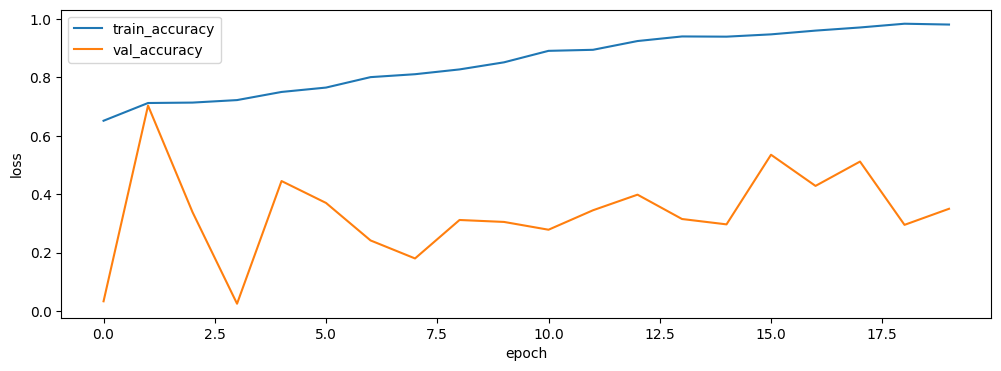

In [19]:
# mlp_his 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(cnn_h.history['accuracy'],label='train_accuracy')
plt.plot(cnn_h.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
## 성능의 일반화가 mlp보다는 더 잘 된건 사실이지만
# train 에 대해 너무 맞춰저서 학습하는 과대적합 현상이 심화됨
# 과대적합을 해소하면 모델의 일반화 성능을 더 높여야됨

| 옵션               | 설명                                                       |
|--------------------|------------------------------------------------------------|
| `rescale`          | 입력 이미지의 픽셀 값 재조정(ex.rescale=1.255 -> 모든 픽셀값들에 대해 0~1 사이로 정규화)|
| `rotation_range`   | 이미지의 회전 범위를 설정(ex.rotation_range -> -20~20도 사이에서 무작위로 회전)|
| `width_shift_range`| 이미지의 수평 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 좌우로 무작위로 이동) |
| `height_shift_range`| 이미지의 수직 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 위아래로 무작위로 이동)|
| `shear_range`      | 시계 반대 방향으로 지정된 각도만큼 변형       |
| `zoom_range`       | 이미지의 확대 및 축소 범위를 설정(ex.0.1 -> 0.9배~1.1배 사이에서 무작위로 확대하거나 축소) |
| `horizontal_flip`  | 이미지를 수평 방향으로 뒤집을지 여부를 설정       |
| `fill_mode`        | 이미지를 변형할 때 생기는 빈 공간을 채우는 방식을 설정(ex.nearest -> 가장 가까운 픽셀값을 사용하여 빈공간 채우기) |

In [18]:
# 이미지 크기 조절 ,픽셀값 변경, 라벨리으 이미지 데이터 증강 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# 증강할 데이터 경로 지정
train_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/train'
test_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/test'

# 증강기 생성(변형할 형식 지정)
train_gen=ImageDataGenerator(
    rescale=1./255,#이미지 픽셀값을 0~1 범위로 스케일
    zoom_range=0.2 ,# 0.8~1.2배 확대 축소
    horizontal_flip=True # 수평방향으로 뒤집기

    )
# 보통 신경망은 작은 입력 값 (일반적으로 0과 1사이의 값)에서 더 잘작동합
# 픽셀값 0~ 255 범위에서 0~1 범위로 스케일링하면 학습과정이 더 안정적이고 빠르게 진행

# test
# 이미지 증강은 train에 대해서만 설정(성능평가에 있어서 방해가 될 수 있음)
test_gen=ImageDataGenerator(rescale=1./255)

In [20]:
 # 이미지 데이터 제네레이터(객체 )생성
 # flow_from_director
 #지정된 디렉토리에서 이미지를 불러오고, 실시간으로 배치로 데이터를 생성하는 기능

 train_generator=train_gen.flow_from_directory(
    train_dir,# 데이터가 있는 경로
    target_size=(224,224), #이미지들의 크기 조정
    batch_size=32,#한번에 변환할 이미지 개수 -> 성능에 따라서 사이즈 조절가능
    class_mode='binary', #이진분류/ 다중분류 categorical

    )
 test_generator=test_gen.flow_from_directory(
     test_dir,
     target_size=(224,224),
     batch_size=32,
     class_mode='binary'
 )

Found 2000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


### Dropout
- 과대적합을 개선
- 학습하는 동안에만 적용
- 신경망을 비율에 따라 일부러 활성화 되지 않도록 꺼버림

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,InputLayer,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

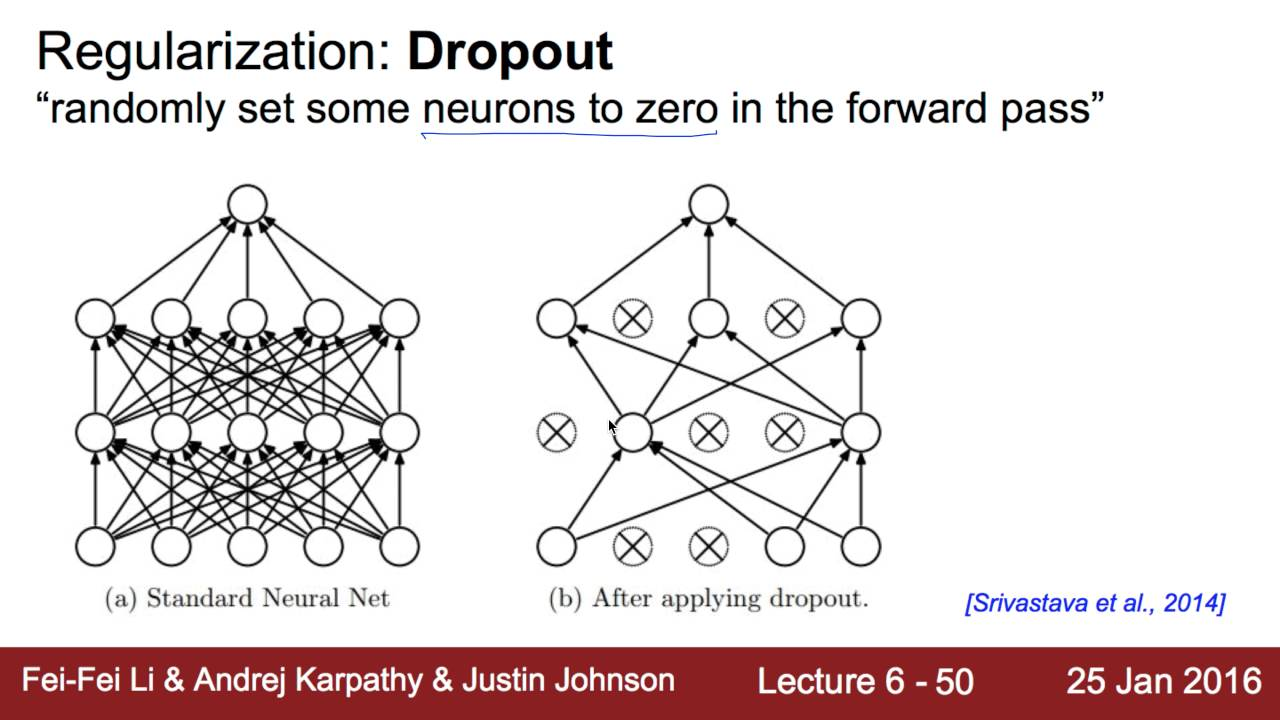

In [24]:
# 1. 설계
cnn_model2=Sequential()
cnn_model2.add(InputLayer(input_shape=(224,224,3)))

#--------- 특징 추출부-------
cnn_model2.add(Conv2D(
    filters=32, #커널의 개수
    kernel_size=(3,3), #커널 사이즈 ,눈의 크기
    activation='relu', #활성화 함수
    padding='same', # 패딩: 입출력의 크기를 동일하게 하기위해 가장자리에0을채움
                   # 이미지 자체가 크거나, 특징이 많을떄
                   # -> valid 사용 # 커널이 밖으로 못나감
                   # 이미지 자체가 작거나, 가장자리에 중요한 정보가 있는경우
                   #  ->same # 커널이 밖으로 나갈 경우  0으로 채워짐
    strides=(2,2)  # 보폭, 양 옆과 위아래로 2픽셀 커널을 이동
))

# ------------pooling층------
cnn_model2.add(MaxPooling2D(
    pool_size=(2,2), #풀링 윈도우 지정
    # 이미지 탐색에서 그 이미지의 특징을 요약하는 픽셀 크기
))
# -----------------------1개의 층임 이걸반복할거임
# Drop out추가1
cnn_model2.add(Dropout(0.4))
# pool 층에 읳 나온 피처맵 중 30%를 무작위로 0으로 만든후 넘김.
cnn_model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',strides=(2,2)))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
# ------------------------------------2층--------


cnn_model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',strides=(2,2)))
#drop out3
cnn_model2.add(Dropout(0.4))
#이미지에서 특징감지
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
# 중요한 특징 요약 노이즈 제거

# ------------분류부----------

cnn_model2.add(Flatten())
cnn_model2.add(Dense(256,activation='relu'))
#드랍3
cnn_model2.add(Dropout(0.3))
cnn_model2.add(Dense(128,activation='relu'))
cnn_model2.add(Dense(64,activation='relu'))

cnn_model2.add(Dense(1,activation='sigmoid'))
#------ 출력층 까지 ---

# 2. 학습 방법 설정

cnn_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 3. 학습

cnn_h2=cnn_model2.fit(#train_x,train_y
                     train_generator,
                     validation_data=test_generator,
                     epochs=20,
                     batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1486s 24s/step - accuracy: 0.4917 - loss: 0.6989 - val_accuracy: 0.5970 - val_loss: 0.6921
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5445 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5220 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5124 - loss: 0.6919 - val_accuracy: 0.6150 - val_loss: 0.6769
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5495 - loss: 0.6844 - val_accuracy: 0.6100 - val_loss: 0.6726
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5404 - loss: 0.6812 - val_accuracy: 0.5640 - val_loss: 0.6763
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5545 - loss: 0.6741 - val_accuracy: 0.5990 - val_loss: 0.6544
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5893 - loss: 0.6612 - val_accuracy: 0.6320 - val_lo

In [ ]:
#cnn_model2.save('/content/drive/MyDrive/Colab Notebooks/est/data/cnn_model.keras')

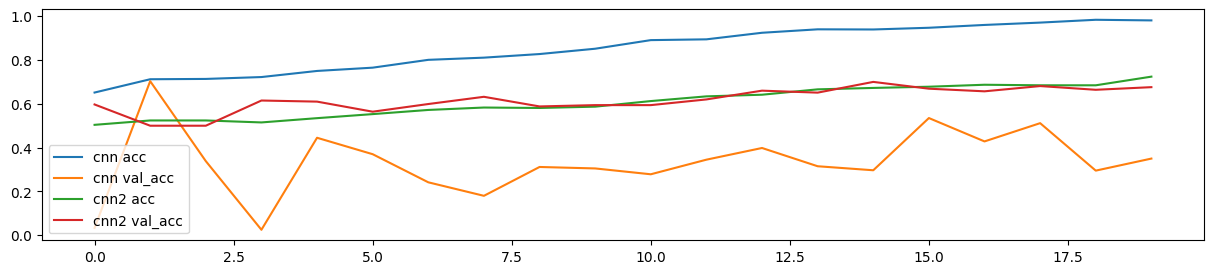

In [42]:
#시각화
plt.figure(figsize = (15,3))
plt.plot(cnn_h.history['accuracy'], label ='cnn acc') # 성능 개선 전
plt.plot(cnn_h.history['val_accuracy'], label = 'cnn val_acc')
plt.plot(cnn_h2.history['accuracy'], label ='cnn2 acc') # 성능 개선 후
plt.plot(cnn_h2.history['val_accuracy'], label = 'cnn2 val_acc')
plt.legend()
plt.show()

In [ ]:
# 아미지 증식을 통해서 나름대로 과대적합이 해소된것을 확인할 수 있음
# 이미지 증식으로 모델 성능 개선
# 이미지 증식 단점 학습 시간이 오래걸림
# 자체적으로 설계한 모델은 검증 여러번 진행하고 수정하는 작업 필요> 시간이 오래걸림

### 전이학습
- 다른사람이 만들어 놓은 모델을 사용해보자

In [22]:
from tensorflow.keras.applications import VGG16

In [23]:
vgg16=VGG16(include_top=False,
            weights='imagenet',
            input_shape=(224,224,3))

#  top: 전결합 분류층, vgg16모델은 다중분류(1000개)이므로 사용하지 않음
# weight: 'imagenet' > 기존에 학습한 가중치 불러옴


2026-01-14 18:05:57.171343: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [24]:
# 모든 comvoluntion 층 동결, 가중치 갱신 막음 학습불가능하게함 이미 잘된거임
# vgg16은 100만장 정도 사진으로 학습이 잘되어있음, 성능이 좋음
# 학습시에 가중치가 갱신되도록 설정해 놓으면, 기존에 학습된 내용이 훼손 -> 성능이 떨어짐
# vgg16.trainalve=False

# 특성 추출부를 고정
for layer in vgg16.layers:
  layer.trainable=False


In [25]:
transfer_model=Sequential()
transfer_model.add(vgg16)
# 분류기층
transfer_model.add(Flatten())
transfer_model.add(Dense(64,activation='relu'))
transfer_model.add(Dense(1,activation='sigmoid'))

In [26]:
# 학습 방법 평가 설정

transfer_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
#학습
th=transfer_model.fit(
    train_generator,
    callbacks=[EarlyStopping(monitor='val_loss',patience=5)],
    validation_data=test_generator,
    epochs=20,
    batch_size=64
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7565 - loss: 0.5720 - val_accuracy: 0.8880 - val_loss: 0.2819
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.8930 - loss: 0.2597 - val_accuracy: 0.9090 - val_loss: 0.2215
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.9170 - loss: 0.2022 - val_accuracy: 0.9190 - val_loss: 0.2044
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9390 - loss: 0.1668 - val_accuracy: 0.9170 - val_loss: 0.2074
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.9500 - loss: 0.1450 - val_accuracy: 0.9010 - val_loss: 0.2370
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 275s 4s/step - accuracy: 0.9605 - loss: 0.1260 - val_accuracy: 0.9310 - val_loss: 0.1813
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.9540 - loss: 0.1285 - val_accuracy: 0.9300 - val_loss: 0.1811
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.9595 - loss: 0.1122 - val_accuracy: 0.9170 - v

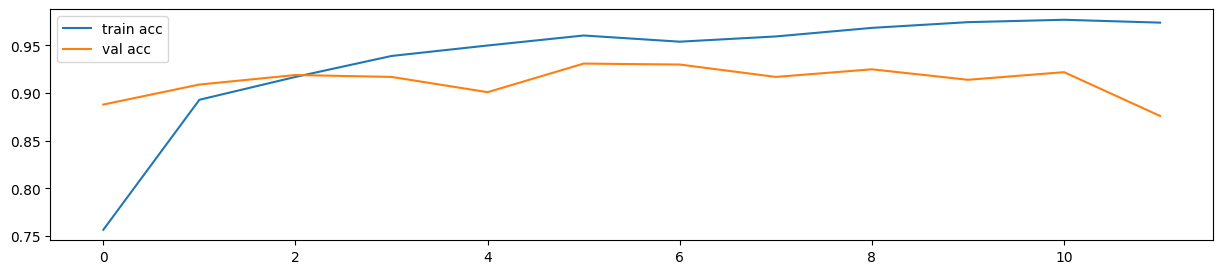

In [29]:
#시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(th.history['accuracy'],label='train acc')
plt.plot(th.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [30]:
transfer_model.save('/home/hyuksu/projects/ml/bootcampdeeplearning/data/model/cat_dogs_binary_transition.keras')